In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestRegressor





In [29]:
df1 = pd.read_csv(
    r"C:\Users\rahul\OneDrive\Desktop\anitha\DSA\project air qulity and water quality\data set\Water_Quality.csv")

In [30]:
df1.head()  

,Well_ID,State,District,Block,Village,Latitude,Longitude,Year,pH,EC,...,NO3,TH,Ca,Mg,Na,K,F,TDS,WQI,Water Quality Classification
0,W232200071580001,Gujarat,Ahmedabad,Mandal,Dalod,NaN,NaN,2020,8.20,16640.0,...,26.00,1451.0,152.0,260.0,3535.0,45.0,1.00,11149,4361.44080,Unsuitable for Drinking
1,W254029084355301,Himachal Pradesh,Solan,Nallagarh,JAGATPUR,31.1594,76.678500,2019,8.44,299.0,...,2.70,84.0,17.0,10.0,39.0,2.4,0.20,262,85.80466,Good
2,W193530074180001,Maharashtra,Ahmednagar,SANGAMNER,Kokangaon,74.3000,19.591667,2022,7.90,1315.0,...,18.20,465.0,80.2,64.4,88.3,1.6,0.53,372,280.04130,Very Poor yet Drinkable
3,W231620072033001,Gujarat,Ahmedabad,Viramgam,Endla,NaN,NaN,2020,7.40,715.0,...,0.23,280.0,56.0,34.0,47.0,11.0,0.46,479,195.11649,Poor
4,W251908084361501,Himachal Pradesh,Solan,Nallagarh,BARUNA,31.1540,76.638400,2019,8.40,270.0,...,10.00,116.0,10.0,18.0,23.0,1.0,0.12,262,81.77860,Good


In [31]:
df1.info()
df1.describe()
df1.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19029 entries, 0 to 19028
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Well_ID                       15244 non-null  object 
 1   State                         19029 non-null  object 
 2   District                      19029 non-null  object 
 3   Block                         17910 non-null  object 
 4   Village                       19028 non-null  object 
 5   Latitude                      18640 non-null  float64
 6   Longitude                     18639 non-null  float64
 7   Year                          19029 non-null  int64  
 8   pH                            19029 non-null  float64
 9   EC                            19029 non-null  float64
 10  CO3                           19029 non-null  float64
 11  HCO3                          19029 non-null  float64
 12  Cl                            19029 non-null  float64
 13  S

(19029, 24)

In [32]:
df1.isnull().sum()


Well_ID                         3785
State                              0
District                           0
Block                           1119
Village                            1
Latitude                         389
Longitude                        390
Year                               0
pH                                 0
EC                                 0
CO3                                0
HCO3                               0
Cl                                 0
SO4                                0
NO3                                0
TH                                 0
Ca                                 0
Mg                                 0
Na                                 0
K                                  0
F                                  0
TDS                                0
WQI                                0
Water Quality Classification       0
dtype: int64

In [33]:
df1 = df1.dropna()  # Drop rows with missing values
df1 = df1.drop_duplicates()  # Drop duplicate rows

In [34]:
df1.dropna(inplace=True)  # Remove rows with missing values
df1.drop_duplicates(inplace=True)  # Remove duplicate rows  
df1 = df1.dropna()  # Drop rows with missing values
df1 = df1.drop_duplicates()  # Drop duplicate rows  
df1.shape
df1.info() 
df1.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 14347 entries, 1 to 19028
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Well_ID                       14347 non-null  object 
 1   State                         14347 non-null  object 
 2   District                      14347 non-null  object 
 3   Block                         14347 non-null  object 
 4   Village                       14347 non-null  object 
 5   Latitude                      14347 non-null  float64
 6   Longitude                     14347 non-null  float64
 7   Year                          14347 non-null  int64  
 8   pH                            14347 non-null  float64
 9   EC                            14347 non-null  float64
 10  CO3                           14347 non-null  float64
 11  HCO3                          14347 non-null  float64
 12  Cl                            14347 non-null  float64
 13  SO4   

,Latitude,Longitude,Year,pH,EC,CO3,HCO3,Cl,SO4,NO3,TH,Ca,Mg,Na,K,F,TDS,WQI
count,14347.000000,1.434700e+04,14347.000000,14347.000000,14347.000000,14347.000000,14347.000000,14347.000000,14347.000000,14347.000000,14347.000000,14347.000000,14347.000000,14347.000000,14347.000000,14347.000000,14347.000000,14347.000000
mean,42.489118,5.196440e+03,2020.546107,7.710351,1168.981667,3.030247,298.561545,162.955266,64.056796,35.841309,323.570916,65.640724,39.247762,108.542313,12.905801,0.605157,712.126019,299.756368
std,29.129427,6.156669e+05,1.304056,0.479388,1233.634419,15.028122,176.539497,321.070554,124.622629,53.743492,280.205513,59.133073,44.786218,183.160712,36.957166,2.065137,665.134511,280.285031
min,0.000000,0.000000e+00,2019.000000,3.060000,2.290000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,0.000000,-0.160000,15.000000,9.694329
25%,21.283315,2.292329e+01,2019.000000,7.450000,554.150000,0.000000,183.000000,35.000000,14.000000,5.300000,170.000000,30.100000,15.800000,29.700000,1.600000,0.210000,375.000000,156.913670
50%,24.413000,7.491600e+01,2021.000000,7.700000,876.000000,0.000000,284.000000,78.000000,31.000000,19.800000,270.000000,52.000000,29.000000,61.000000,3.300000,0.440000,597.000000,238.496780
75%,77.075128,7.844050e+01,2022.000000,7.990000,1373.500000,0.000000,390.482000,170.000000,67.000000,43.550000,395.000000,82.000000,48.600000,117.890000,9.100000,0.780000,930.000000,357.502440
max,95.899167,7.374400e+07,2022.000000,10.610000,26520.000000,368.000000,3112.000000,9217.000000,2980.000000,1534.900000,5750.000000,1062.100000,1277.000000,5489.000000,1353.000000,168.000000,17768.000000,6850.888720


In [35]:
df1.columns


Index(['Well_ID', 'State', 'District', 'Block', 'Village', 'Latitude',
       'Longitude', 'Year', 'pH', 'EC', 'CO3', 'HCO3', 'Cl', 'SO4', 'NO3',
       'TH', 'Ca', 'Mg', 'Na', 'K', 'F', 'TDS', 'WQI',
       'Water Quality Classification'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Matrix')

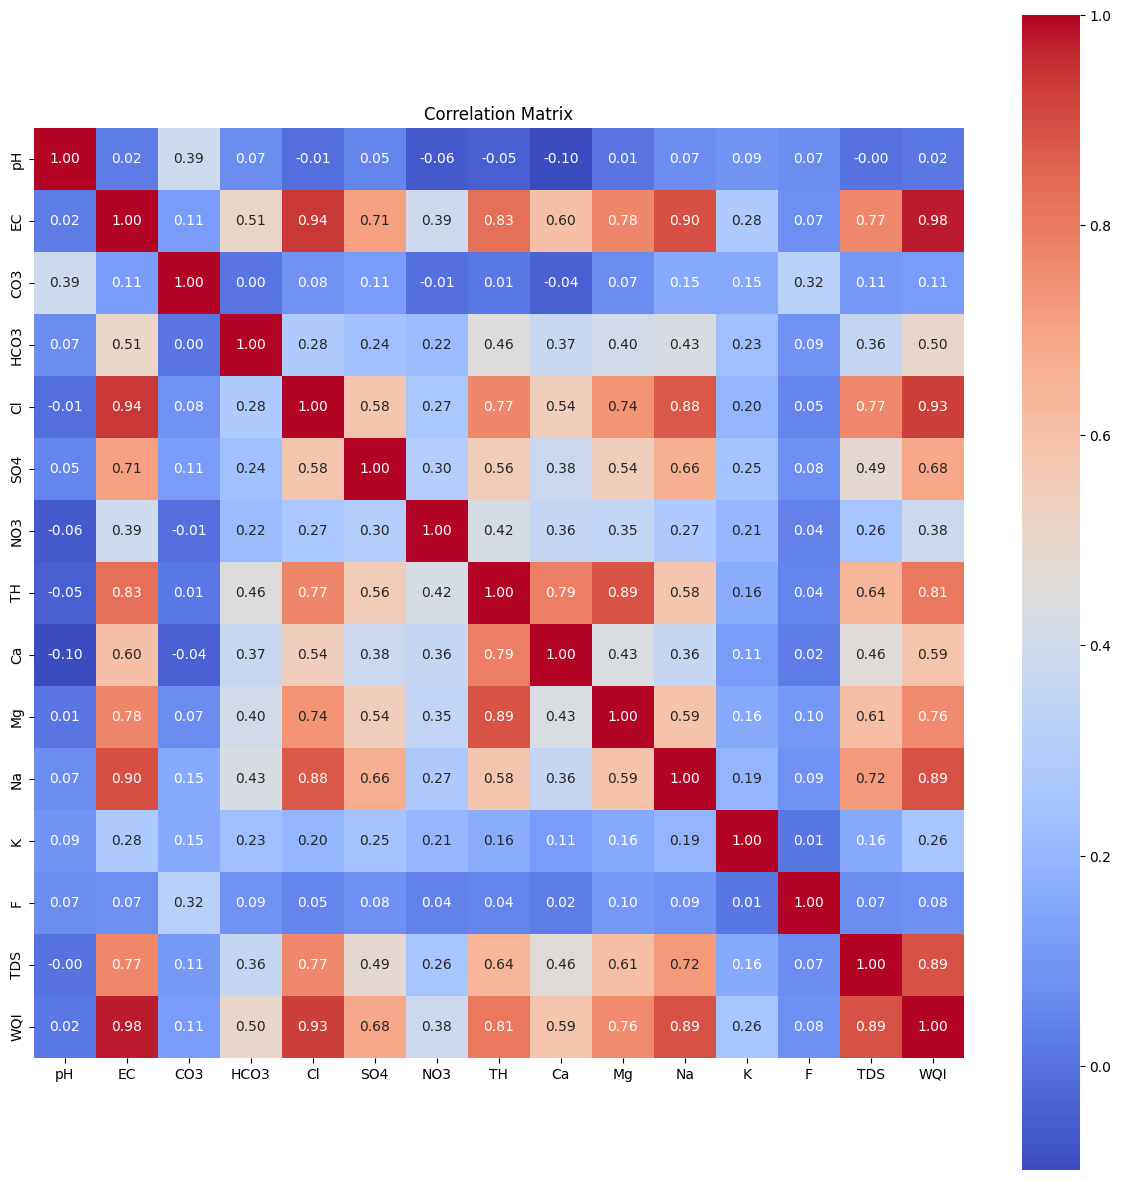

In [36]:
df2 = df1.drop(
    ['Well_ID', 'State', 'District', 'Block', 'Village', 'Latitude',
       'Longitude', 'Year',
        "Water Quality Classification"],axis=1,)  # Drop specified  to check correlation    
corr_matrix = df2.corr()
plt.figure(figsize=(15, 15)) 
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')

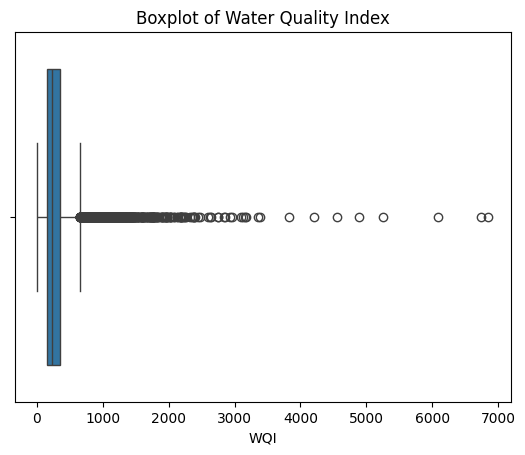

In [37]:
sns.boxplot(x=df2['WQI'])   
plt.title('Boxplot of Water Quality Index')
plt.show()



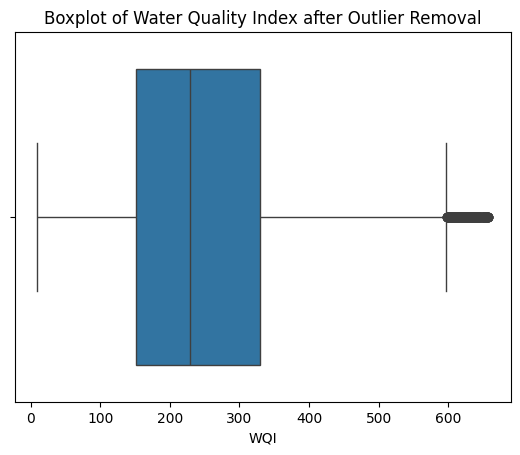

<class 'pandas.core.frame.DataFrame'>
Index: 13491 entries, 1 to 19028
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pH      13491 non-null  float64
 1   EC      13491 non-null  float64
 2   CO3     13491 non-null  float64
 3   HCO3    13491 non-null  float64
 4   Cl      13491 non-null  float64
 5   SO4     13491 non-null  float64
 6   NO3     13491 non-null  float64
 7   TH      13491 non-null  float64
 8   Ca      13491 non-null  float64
 9   Mg      13491 non-null  float64
 10  Na      13491 non-null  float64
 11  K       13491 non-null  float64
 12  F       13491 non-null  float64
 13  TDS     13491 non-null  int64  
 14  WQI     13491 non-null  float64
dtypes: float64(14), int64(1)
memory usage: 1.6 MB


(13491, 15)

In [38]:
Q1 = df2['WQI'].quantile(0.25)
Q3 = df2['WQI'].quantile(0.75)  
IQR = Q3 - Q1  # Interquartile range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df2 = df2[(df2['WQI'] >= lower_bound) & (df2['WQI'] <= upper_bound)]  # Remove outliers
sns.boxplot(x=df2['WQI'])
plt.title('Boxplot of Water Quality Index after Outlier Removal')

plt.show()
df2.info()
df2.describe()  
df2.shape


In [39]:
df2.columns

Index(['pH', 'EC', 'CO3', 'HCO3', 'Cl', 'SO4', 'NO3', 'TH', 'Ca', 'Mg', 'Na',
       'K', 'F', 'TDS', 'WQI'],
      dtype='object')

In [40]:
df2=df2.drop('EC',axis=1)

In [41]:
x= df2.drop('WQI', axis=1)  # Features
y = df2['WQI']  # Target variable   

In [42]:
results = pd.DataFrame({'Model':[], 'MSE':[], 'R2 Score':[]})


Mean Squared Error: 192.69504933936616
R-squared Score: 0.9897216061442633


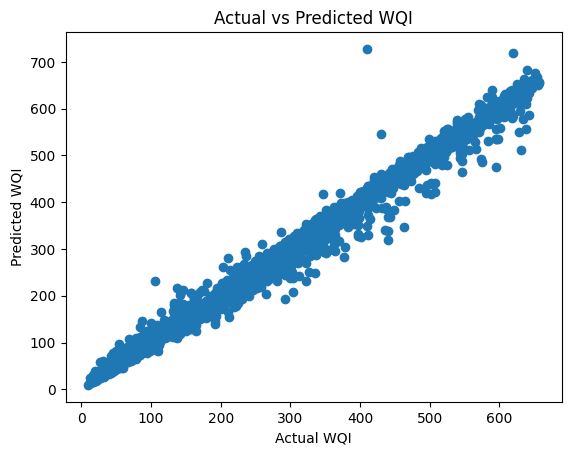

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)  # Split the data into training and testing sets  
lr_model = LinearRegression()  # Create a linear regression model
lr_model.fit(x_train, y_train)  # Train the model   
y_pred = lr_model.predict(x_test)  # Make predictions on the test set
mse = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error
r2 = r2_score(y_test, y_pred)  # Calculate R-squared score
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")  # Print the R-squared score
plt.scatter(y_test, y_pred)  # Scatter plot of actual vs predicted values
plt.xlabel('Actual WQI')
plt.ylabel('Predicted WQI')
plt.title('Actual vs Predicted WQI')
plt.show()
lr_model_df=pd.DataFrame({'Model': 'Linear Regression', 'MSE': mse, 'R2 Score': r2}, index=[0])  # Store results in DataFrame
results=pd.concat([results, lr_model_df], ignore_index=True)  # Append the results to the DataFrame    

Mean Squared Error: 192.69504933936614
R-squared: 0.9897216061442633


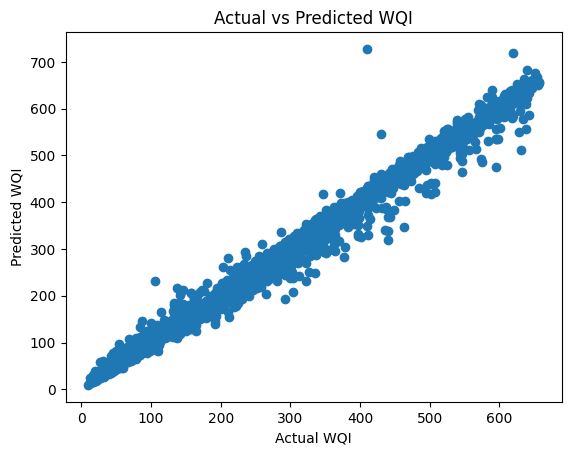

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)  # Split the data into training and testing sets
scaler = StandardScaler()  # Initialize the scaler
x_train_scaled = scaler.fit_transform(x_train)  # Fit and transform the training data
x_test_scaled = scaler.transform(x_test)  # Transform the testing data
lr_model = LinearRegression()  # Initialize the linear regression model 
lr_model.fit(x_train_scaled, y_train)  # Fit the model to the training data
y_pred = lr_model.predict(x_test_scaled)  # Make predictions on the test data
mse = mean_squared_error(y_test, y_pred)  # Calculate Mean Squared Error
r2 = r2_score(y_test, y_pred)  # Calculate R-squared score
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
plt.scatter(y_test, y_pred)  # Scatter plot of actual vs predicted values
plt.xlabel('Actual WQI')
plt.ylabel('Predicted WQI')
plt.title('Actual vs Predicted WQI')
plt.show()
std_scaled_lr_model_df = pd.DataFrame({'Model': 'Standard Scaled Linear Regression', 'MSE': mse, 'R2 Score': r2}, index=[0])  # Store results in DataFrame
results = pd.concat([results, std_scaled_lr_model_df], ignore_index=True)  # Append

scaling

In [45]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_minmaxscaled = scaler.fit_transform(x)  # Scale features    
x_minmaxscaled = pd.DataFrame(x_minmaxscaled, columns=x.columns)  # Convert back to DataFrame
x_minmaxscaled.head()
x_train, x_test, y_train, y_test = train_test_split(x_minmaxscaled, y, test_size=0.4, random_state=42)  # Split the data
knn_model = KNeighborsRegressor(n_neighbors=5)  # Initialize KNN model  
knn_model.fit(x_train, y_train)  # Train the model
y_pred_knn = knn_model.predict(x_test)  # Make predictions
mse_knn = mean_squared_error(y_test, y_pred_knn)  # Calculate
print(f"KNN Mean Squared Error: {mse_knn}")
r2_knn = r2_score(y_test, y_pred_knn)  # Calculate
print(f"KNN R-squared: {r2_knn}")
Minmax_scaled_knn_model_df = pd.DataFrame({'Model': 'MinMax Scaled KNN Regression', 'MSE': mse_knn, 'R2 Score': r2_knn}, index=[0])  # Store results in DataFrame
results = pd.concat([results, Minmax_scaled_knn_model_df], ignore_index=True)

KNN Mean Squared Error: 483.00775250531046
KNN R-squared: 0.9742362664082747


In [46]:
from sklearn.preprocessing import PolynomialFeatures

scaler = StandardScaler()
x_scaled= scaler.fit_transform(x)  # Scale features
poly = PolynomialFeatures(degree=2)  # Initialize polynomial features
x_poly = poly.fit_transform(x_scaled)  # Transform features to polynomial features  
from sklearn.linear_model import LinearRegression
poly_lr_model = LinearRegression()  # Initialize polynomial regression model
poly_lr_model.fit(x_poly, y)  # Train the model
y_poly_pred = poly_lr_model.predict(x_poly)  # Make predictions
mse_poly = mean_squared_error(y, y_poly_pred)  # Calculate Mean Squared
print(f"Polynomial Regression with sc Mean Squared Error: {mse_poly}")
r2_poly = r2_score(y, y_poly_pred)  # Calculate R-squared
print(f"Polynomial Regression with sc R-squared: {r2_poly}")
poly_model_df = pd.DataFrame({'Model': 'Polynomial Regression with scaled', 'MSE': mse_poly, 'R2 Score': r2_poly}, index=[0])  # Store results in DataFrame
results = pd.concat([results, poly_model_df], ignore_index=True)  # Append the results

Polynomial Regression with sc Mean Squared Error: 139.2387604398019
Polynomial Regression with sc R-squared: 0.9924028626692152


In [47]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)  # Initialize polynomial features
x_poly = poly.fit_transform(x)  # Transform features to polynomial features  
from sklearn.linear_model import LinearRegression
poly_lr_model = LinearRegression()  # Initialize polynomial regression model
poly_lr_model.fit(x_poly, y)  # Train the model
y_poly_pred = poly_lr_model.predict(x_poly)  # Make predictions
mse_poly = mean_squared_error(y, y_poly_pred)  # Calculate Mean Squared
print(f"Polynomial Regression  Mean Squared Error: {mse_poly}")
r2_poly = r2_score(y, y_poly_pred)  # Calculate R-squared
print(f"Polynomial Regression  R-squared: {r2_poly}")
poly_model_df   = pd.DataFrame({'Model': 'Polynomial Regression ', 'MSE': mse_poly, 'R2 Score': r2_poly}, index=[0])  # Store results in DataFrame
results = pd.concat([results, poly_model_df], ignore_index=True)  # Append the results

Polynomial Regression  Mean Squared Error: 139.23876043980187
Polynomial Regression  R-squared: 0.9924028626692152


In [48]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Initialize Random Forest model
rf_model.fit(x_train, y_train)  # Train the model
y_pred_rf = rf_model.predict(x_test)  # Make predictions    
mse_rf = mean_squared_error(y_test, y_pred_rf)  # Calculate Mean Squared Error
r2_rf = r2_score(y_test, y_pred_rf)  # Calculate R-squared
print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R-squared: {r2_rf}")  
randomforesst_model_df = pd.DataFrame({'Model': 'Random Forest Regression', 'MSE': mse_rf, 'R2 Score': r2_rf}, index=[0])  # Store results in DataFrame
results = pd.concat([results, randomforesst_model_df], ignore_index=True)  #

Random Forest Mean Squared Error: 291.9895747327036
Random Forest R-squared: 0.9844252155872139


In [49]:
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42) 
gb_model.fit(x_train, y_train)  # Train the model
y_pred_gb = gb_model.predict(x_test)  # Make predictions
mse_gb = mean_squared_error(y_test, y_pred_gb)  # Calculate Mean Squared Error
r2_gb = r2_score(y_test, y_pred_gb)  # Calculate R-squared
print(f"Gradient Boosting Mean Squared Error: {mse_gb}")
print(f"Gradient Boosting R-squared: {r2_gb}")
gb_model_df = pd.DataFrame({'Model': 'Gradient Boosting Regression', 'MSE': mse_gb, 'R2 Score': r2_gb}, index=[0])  # Store results in DataFrame
results = pd.concat([results, gb_model_df], ignore_index=True)  # Append the results

Gradient Boosting Mean Squared Error: 281.5511383552251
Gradient Boosting R-squared: 0.9849820039463005


In [50]:
from sklearn.ensemble import AdaBoostRegressor
ada_model = AdaBoostRegressor(n_estimators=100, random_state=42)  # Initialize AdaBoost model
ada_model.fit(x_train, y_train)  # Train the model
y_pred_ada = ada_model.predict(x_test)  # Make predictions
mse_ada = mean_squared_error(y_test, y_pred_ada)  # Calculate Mean Squared Error
r2_ada = r2_score(y_test, y_pred_ada)  # Calculate
print(f"AdaBoost Mean Squared Error: {mse_ada}")
print(f"AdaBoost R-squared: {r2_ada}")
ada_model_df = pd.DataFrame({'Model': 'AdaBoost Regression', 'MSE': mse_ada, 'R2 Score': r2_ada}, index=[0])  # Store results in DataFrame
results = pd.concat([results, ada_model_df], ignore_index=True)  # Append the results


AdaBoost Mean Squared Error: 2357.7723260598605
AdaBoost R-squared: 0.8742359356273873


In [51]:
from sklearn.linear_model import ElasticNet
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5  )  # Initialize ElasticNet model
elastic_net_model.fit(x_train, y_train)  # Train the model      
y_pred_en = elastic_net_model.predict(x_test)  # Make predictions
mse_en = mean_squared_error(y_test, y_pred_en)  # Calculate Mean Squ
print(f"ElasticNet Mean Squared Error: {mse_en}")
r2_en = r2_score(y_test, y_pred_en)  # Calculate R-squared
print(f"ElasticNet R-squared: {r2_en}")
elastic_net_model_df = pd.DataFrame({'Model': 'ElasticNet Regression', 'MSE': mse_en, 'R2 Score': r2_en}, index=[0])  # Store results in DataFrame
results = pd.concat([results, elastic_net_model_df], ignore_index=True)  # Append the results

ElasticNet Mean Squared Error: 7685.893748169455
ElasticNet R-squared: 0.5900328350527497


In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split    
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)  # Split the data into training and testing sets
scaler = StandardScaler()  # Initialize the scaler  
x_train_scaled = scaler.fit_transform(x_train)  # Fit and transform the training data
x_test_scaled = scaler.transform(x_test)  # Transform the testing data
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train_scaled, y_train)  # Train the model
y_pred_rf = rf_model.predict(x_test_scaled)  # Make predictions
mse_rf = mean_squared_error(y_test, y_pred_rf)  # Calculate Mean Squared Error
r2_rf = r2_score(y_test, y_pred_rf)  # Calculate R-squared
print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R-squared: {r2_rf}")
randomforesst_model_df = pd.DataFrame({'Model': 'Random Forest Regression with Scaling', 'MSE': mse_rf, 'R2 Score': r2_rf}, index=[0])  # Store results in DataFrame
results = pd.concat([results, randomforesst_model_df], ignore_index=True)  #   Append the results  


Random Forest Mean Squared Error: 292.0492993487066
Random Forest R-squared: 0.9844220298638221


In [53]:

print(results)  # Display the results DataFrame



                                   Model          MSE  R2 Score
0                      Linear Regression   192.695049  0.989722
1      Standard Scaled Linear Regression   192.695049  0.989722
2           MinMax Scaled KNN Regression   483.007753  0.974236
3      Polynomial Regression with scaled   139.238760  0.992403
4                 Polynomial Regression    139.238760  0.992403
5               Random Forest Regression   291.989575  0.984425
6           Gradient Boosting Regression   281.551138  0.984982
7                    AdaBoost Regression  2357.772326  0.874236
8                  ElasticNet Regression  7685.893748  0.590033
9  Random Forest Regression with Scaling   292.049299  0.984422


Polynomial Regression 
- Lowest Mean Squared Error: Indicates the most accurate predictions.
- Highest R² Score: Explains over 99% of the variance in WQI, which is excellent.
- Captures Non-linear Relationships: Polynomial regression can model complex interactions between water quality parameters (like pH, TDS, NO₃, etc.) better than Random Forest in this case.

🔍 When Random Forest Might Be Preferred. Despite Polynomial Regression performing better here, Random Forest has its strengths:
- Robust to outliers and noise
- Handles missing data better
- Provides feature importance
- Less risk of overfitting with high-degree polynomials
So if dataset grows, becomes noisier, or includes more categorical features, Random Forest might become more competitive.


In [54]:
import pickle
with open('water_quality_model.pkl', 'wb') as file:  # Save the model
    pickle.dump(rf_model, file)  # Save the Random Forest model
    print("Model saved to 'water_quality_model.pkl'")  # Confirmation message
    

Model saved to 'water_quality_model.pkl'
